In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('data/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.000,84.879,10,24.983,121.540,37.900
1,2,2012.917,19.500,306.595,9,24.980,121.540,42.200
2,3,2013.583,13.300,561.985,5,24.987,121.544,47.300
3,4,2013.500,13.300,561.985,5,24.987,121.544,54.800
4,5,2012.833,5.000,390.568,5,24.979,121.542,43.100
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.700,4082.015,0,24.942,121.504,15.400
410,411,2012.667,5.600,90.456,9,24.974,121.543,50.000
411,412,2013.250,18.800,390.970,7,24.979,121.540,40.600
412,413,2013.000,8.100,104.810,5,24.967,121.541,52.500


In [ ]:
df = df.dropna()


In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.000,84.879,10,24.983,121.540,37.900
1,2,2012.917,19.500,306.595,9,24.980,121.540,42.200
2,3,2013.583,13.300,561.985,5,24.987,121.544,47.300
3,4,2013.500,13.300,561.985,5,24.987,121.544,54.800
4,5,2012.833,5.000,390.568,5,24.979,121.542,43.100
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.700,4082.015,0,24.942,121.504,15.400
410,411,2012.667,5.600,90.456,9,24.974,121.543,50.000
411,412,2013.250,18.800,390.970,7,24.979,121.540,40.600
412,413,2013.000,8.100,104.810,5,24.967,121.541,52.500


In [ ]:
df = df.astype(int)

In [ ]:
Y = df["Y house price of unit area"]
X = df[["No","X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]]


In [ ]:
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012,32,84,10,24,121
1,2,2012,19,306,9,24,121
2,3,2013,13,561,5,24,121
3,4,2013,13,561,5,24,121
4,5,2012,5,390,5,24,121
...,...,...,...,...,...,...,...
409,410,2013,13,4082,0,24,121
410,411,2012,5,90,9,24,121
411,412,2013,18,390,7,24,121
412,413,2013,8,104,5,24,121


In [ ]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012,32,84,10,24,121
1,2012,19,306,9,24,121
2,2013,13,561,5,24,121
3,2013,13,561,5,24,121
4,2012,5,390,5,24,121
...,...,...,...,...,...,...
409,2013,13,4082,0,24,121
410,2012,5,90,9,24,121
411,2013,18,390,7,24,121
412,2013,8,104,5,24,121


In [ ]:
Y

0      37
1      42
2      47
3      54
4      43
       ..
409    15
410    50
411    40
412    52
413    63
Name: Y house price of unit area, Length: 414, dtype: int64

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))


In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

X_test = sm.add_constant(X_test)

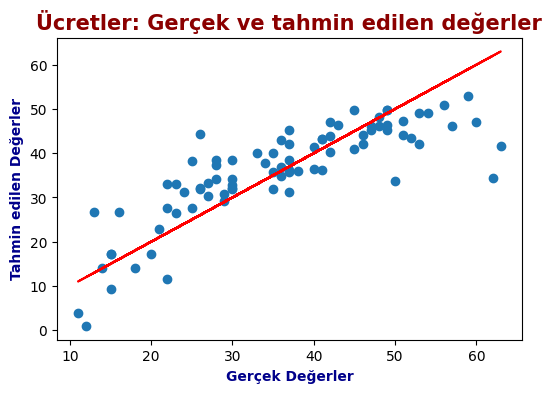

Ortalama Mutlak Hata (MAE)        : 5.524305128253031
Ortalama Kare Hata (MSE)          : 54.76895077486788
Ortalama Mutlak Yüzde Hata (MAPE) : 18.669264332036292


In [ ]:


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_pred)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))


### deneme

In [ ]:
from collections import OrderedDict

In [ ]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012,32,84,10,24,121
1,2012,19,306,9,24,121
2,2013,13,561,5,24,121
3,2013,13,561,5,24,121
4,2012,5,390,5,24,121
...,...,...,...,...,...,...
409,2013,13,4082,0,24,121
410,2012,5,90,9,24,121
411,2013,18,390,7,24,121
412,2013,8,104,5,24,121


In [ ]:
X.info()
 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   X1 transaction date                     414 non-null    int64
 1   X2 house age                            414 non-null    int64
 2   X3 distance to the nearest MRT station  414 non-null    int64
 3   X4 number of convenience stores         414 non-null    int64
 4   X5 latitude                             414 non-null    int64
 5   X6 longitude                            414 non-null    int64
dtypes: int64(6)
memory usage: 22.6 KB


In [ ]:
Label_list = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']
Data_List =[2013,5,100,7,24,121]
new_data = pd.Series(Data_List,Label_list)


In [ ]:
new_data

X1 transaction date                       2013
X2 house age                                 5
X3 distance to the nearest MRT station     100
X4 number of convenience stores              7
X5 latitude                                 24
X6 longitude                               121
dtype: int64

In [ ]:
new_data = pd.Series(new_data).values.reshape(1,-1)

In [ ]:
predictions_new = reg.predict(new_data)
predictions_new = np.argmax(new_data, axis=1)
y_pred = reg.predict(new_data)


In [ ]:
y_pred

array([50.62048696])